# Transformers Assignment (Graded): Emotion Classification using Transformer Architecture

Welcome to your programming assignment on Transformer Architecture! You will build a Deep Learning Model with Transformer Architecture to accurately predict the emotion expressed in a given text input.

## Problem Description

Develop a text-based emotion classification model using a Transformer architecture. The model should accurately predict the emotion expressed in a given text input, choosing from a predefined set of emotion categories.

## Dataset Description

The project utilizes the "emotion" dataset from the Hugging Face datasets library. This dataset contains text samples labeled with various emotions. The emotions are represented as numerical labels, which correspond to specific emotional states (e.g., joy, sadness, anger, etc.).

Key characteristics of the dataset:

- 20,000 examples (split configuration)
- 6 emotion classes: sadness, joy, love, anger, fear, surprise
- Text data: English Twitter messages
- Labels: Numerical (0-5) corresponding to emotions

The emotion dataset contains English Twitter messages labeled with six basic emotions. It has two configurations:

1. Split configuration:
   - 16,000 training examples
   - 2,000 validation examples
   - 2,000 test examples

2. Unsplit configuration:
   - 416,809 examples in a single train split

Each data instance consists of:
- "text": a string feature containing the Twitter message
- "label": a numerical label (0-5) corresponding to the emotion

For more information, refer to this link: [Emotion Dataset](https://huggingface.co/datasets/dair-ai/emotion)

For the scope of this Assignment, we'll be using the Split configuration of the data.

## Assignment Tasks

1. **Data Preprocessing**
   - Load the emotion dataset using the Hugging Face datasets library
   - Preprocess the text data (lowercase conversion, punctuation removal)
   - Tokenize and pad the text sequences
   - Handle class imbalance using oversampling techniques

2. **Transformer Architecture Implementation**
   - Implement key components of the Transformer architecture:
     - Positional Encoding
     - Scaled Dot-Product Attention
     - Multi-Head Attention
     - Transformer Block

3. **Model Development**
   - Create a Transformer-based model for emotion classification
   - Implement the model using TensorFlow and Keras
   - Configure model hyperparameters (number of layers, dimensions, etc.)

4. **Model Training**
   - Compile the model with appropriate loss function and optimizer
   - Train the model on the preprocessed dataset
   - Implement validation during training

5. **Model Evaluation**
   - Evaluate the trained model on the test set
   - Calculate and report test accuracy

6. **Emotion Prediction**
   - Develop a function to predict emotions for new text inputs
   - Demonstrate the use of the prediction function with a sample text

7. **Analysis and Reporting**
   - Analyze the model's performance and discuss results
   - Suggest potential improvements or extensions to the project

## Instructions

- Only write code when you see any of the below prompts,

    ```
    # YOUR CODE GOES HERE
    # YOUR CODE ENDS HERE
    # TODO
    ```

- Do not modify any other section of the code unless tated otherwise in the comments.

# Code Section

In [1]:
# import the necessary packages
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from helpers.methods import load_emotion_dataset, detect_and_set_device
from tests.test_methods import test_preprocess_data, test_positional_encoding, test_multi_head_attention, test_transformer_block, test_transformer_model, test_train_model, test_evaluate_model

In [2]:
# Load the data into training and testing sets
train_df, test_df = load_emotion_dataset()

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

c:\Users\arj64\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arj64\.cache\huggingface\hub\datasets--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

## Task: Let's get to know about our dataset

### Shape of the dataset: Testing and Training

In [3]:
# TODO: Display the shape of the data
train_df_shape = train_df.shape
test_df_shape = test_df.shape

print(f"Train data shape: {train_df_shape}")
print(f"Test data shape: {test_df_shape}")

Train data shape: (16000, 2)
Test data shape: (2000, 2)


### Label Distribution in each class

c:\Users\arj64\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


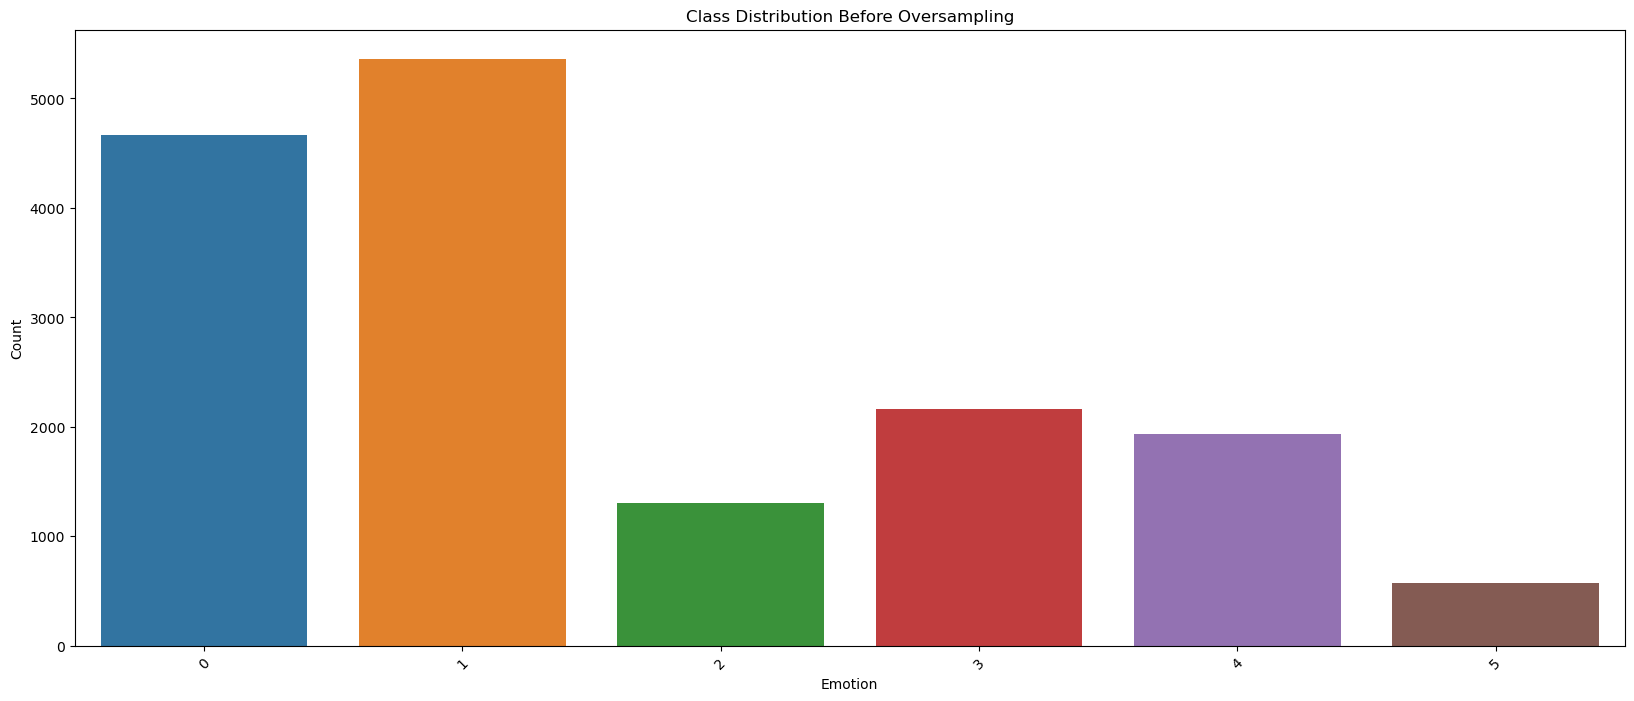

In [4]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Plot the class distribution of the training data
class_counts_before = Counter(train_df['label'])

# Create a figure 
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))

# Plot class distribution before oversampling
sns.barplot(x=list(class_counts_before.keys()), y=list(class_counts_before.values()), ax=ax1)
ax1.set_title('Class Distribution Before Oversampling')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

**write your interpretation of the visualization here:**






## Task: Preprocessing the dataset

**Task Hints:**

Complete the preprocess_data method.

- Implement the preprocess_text function to convert text to lowercase and remove non-alphanumeric characters.

- Use the Tokenizer class from Keras to tokenize the text data. Set the vocabulary size and out-of-vocabulary token.

- Apply padding to the tokenized sequences using pad_sequences to ensure uniform length. Set the maximum sequence length.

- Convert the labels (y_train and y_test) to numpy arrays for compatibility with the model.

- Use RandomOverSampler from imbalanced-learn to handle class imbalance in the training data.

- Extract unique emotion labels from the training data and calculate the number of classes.

- Ensure all preprocessed data and metadata (X_train, y_train, X_test, y_test, tokenizer, emotion_labels, num_classes) are returned by the function.

In [5]:
import re
def preprocess_text(text_series):
    # TODO: Preprocess text data by converting to lowercase and removing special characters.
    # The function takes a pandas Series containing text data and performs the following:
    # 1. Converts all text to lowercase
    # 2. Removes all non-alphanumeric characters except spaces using regex
    text_series = text_series.str.lower()
    text_series = text_series.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    return text_series

def preprocess_data(train_data, test_data, max_vocab_size=10000, max_seq_length=50):
    # TODO: Preprocess text
    train_data['text'] = preprocess_text(train_data['text'])
    test_data['text'] = preprocess_text(test_data['text'])
    # TODO: Tokenize the text data
    tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
    # TODO: Fit the tokenizer on the training data
    tokenizer.fit_on_texts(train_data['text'])
    # TODO: Convert text data to sequences and pad sequences
    X_train = tokenizer.texts_to_sequences(train_data['text'])
    X_test = tokenizer.texts_to_sequences(test_data['text'])
    X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post', truncating='post')
    X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post', truncating='post')
    # TODO: Get the labels
    y_train = train_data['label'].values
    y_test = test_data['label'].values
    # TODO: Perform oversampling on the training data
    oversampler = RandomOverSampler(random_state=42)
    # TODO: Resample the training data
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    # TODO: Get the emotion labels and number of classes
    emotion_labels = np.unique(y_train)
    num_classes =len(emotion_labels)
    
    
    
    #---------------- Do not change the code below ----------------#
    # Run the test
    test_preprocess_data(X_train, X_test, y_train, y_test, tokenizer, emotion_labels, num_classes)
    return X_train_resampled, y_train_resampled, X_test, y_test, tokenizer, emotion_labels, num_classes

## Model Building

### Positional Encoding Implementation

**Task Hints:**

Implement the PositionalEncoding class:

- In `__init__`, initialize the positional encoding matrix using `positional_encoding`.

- Implement `get_angles` to calculate the angles for positional encoding using the provided formula.

- In `positional_encoding`:
  - Generate angle radians using `get_angles`.
  - Apply sine to even indices and cosine to odd indices of the angle radians.
  - Concatenate sine and cosine values to create the positional encoding.
  - Add an extra dimension at the start and cast to float32.

- In `call`, add the positional encoding to the input tensor. Ensure the encoding is sliced to match the input sequence length.

- Use TensorFlow operations (tf.range, tf.newaxis, tf.concat, etc.) for efficient computation.

- Ensure the output shape matches the input shape with the added positional information.

In [6]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        # TODO: Compute the angles for the positional encoding
        angles =1 / tf.pow(10000.0, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        # Return the angles * position
        return position * angles

    def positional_encoding(self, position, d_model):
        # TODO: Compute the angles for the positional encoding
        position = tf.range(position, dtype=tf.float32)[:, tf.newaxis]
        i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
        angle_rads = self.get_angles(
            # YOUR CODE BEGINS HERE
            # pass the position, i and d_model
            position,
            i,
            d_model
            # YOUR CODE ENDS HERE
        )
        
        # TODO: Apply sin to even indices in the array
        sin_values = tf.sin(angle_rads[:, 0::2])  # Even indices
        # TODO: Apply cos to odd indices in the array
        cos_values = tf.cos(angle_rads[:, 1::2])  # Odd indices
        # TODO: Concatenate the sines and cosines
        pos_encoding = tf.concat([sin_values, cos_values], axis=-1)
        # TODO: Add batch dimension
        pos_encoding = pos_encoding[tf.newaxis, ...]
        # Return the positional encoding
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]
    
#---------------- Do not change the code below ----------------#
test_positional_encoding(PositionalEncoding(100, 512))
    

'All positional encoding tests passed.'

### Scaled Dot Product Implementation

**Task Hints:**

Implement the scaled_dot_product_attention function:

- Use tf.matmul for matrix multiplication between query and key (with transpose_b=True).

- Calculate the depth as the last dimension of the key tensor, casting to float32.

- Scale the dot product by dividing by the square root of the depth.

- If a mask is provided, add a large negative value (-1e9) to the masked positions in the logits.

- Apply softmax to the logits to obtain attention weights.

- Compute the final output by matrix multiplication of attention weights and values.

- Ensure the function handles batched inputs correctly.

- Consider adding an optional parameter for temperature in the softmax calculation for potential experimentation.

In [7]:
def scaled_dot_product_attention(query, key, value, mask):
    # TODO: Compute the dot product of the query and key
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    # TODO: Get the depth of the key
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    # TODO: Scale the dot product
    scaled_attention_logits = matmul_qk / tf.math.sqrt(depth)
    # Add the mask to zero out padding tokens
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    # TODO: Compute the attention weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    # TODO: Compute the output which is the weighted sum of the value
    output = tf.matmul(attention_weights, value)
    # Return the output
    return output

### Multi-Head Attention Implementation

**Task Hints:**

Implement the MultiHeadAttention class:

- In `__init__`:
  - Ensure that `d_model` is divisible by `num_heads`.
  - Calculate `depth` as `d_model // num_heads`.
  - Initialize Dense layers for query, key, value projections (wq, wk, wv) and output projection (dense).

- Implement `split_heads`:
  - Reshape the input tensor to separate the last dimension into `num_heads` and `depth`.
  - Transpose the resulting tensor to bring the `num_heads` dimension to the correct position.

- In `call`:
  - Apply the query, key, and value projections using the respective Dense layers.
  - Use `split_heads` to reshape q, k, and v for multi-head processing.
  - Call `scaled_dot_product_attention` with the reshaped q, k, v, and the provided mask.
  - Transpose and reshape the attention output to combine the heads.
  - Apply the output projection using the `dense` layer.

- Ensure the method handles batched inputs correctly.

- Consider adding a dropout layer after the output projection for regularization.

- You may want to add an optional `training` parameter to `call` for potential dropout usage.

- Ensure the output shape is correct: (batch_size, seq_len, d_model).

In [8]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        # Ensure d_model is divisible by the number of heads
        assert d_model % self.num_heads == 0
        
        # TODO: Depth of the model
        self.depth = d_model // self.num_heads
        
        # TODO: Dense layers for query, key, and value
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        # Dense layer for the output
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        # TODO: Split the last dimension into (num_heads, depth)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        # Return the transposed result
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        # TODO: Get the batch size
        batch_size = tf.shape(q)[0]
        # TODO: Pass the query, key, and value through the dense layers
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        # TODO: Split the heads for the query, key, and value
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        # TODO: Compute the scaled dot product attention
        scaled_attention= scaled_dot_product_attention(q, k, v, mask)
        
        # TODO: Transpose the result to (batch_size, seq_len_q, num_heads, depth)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # TODO: Concatenate the heads to get the concatenated attention result
        concat_attention = tf.reshape(scaled_attention,(batch_size, -1, self.d_model))
        
        # TODO: Pass the con through the dense layer to get the final output
        output = self.dense(concat_attention)
        return output
    
    
#---------------- Do not change the code below ----------------#
mha = MultiHeadAttention(d_model=128, num_heads=8)
print(test_multi_head_attention(mha))

All test cases passed of Multi-head attention block!


### Transformer Block Implementation

**Task Hints:**

Implement the TransformerBlock class:

- In `__init__`:
  - Initialize the MultiHeadAttention layer with `d_model` and `num_heads`.
  - Create a feed-forward network (ffn) using a Sequential model with two Dense layers:
    - First layer: `dff` units with ReLU activation
    - Second layer: `d_model` units with no activation
  - Initialize two LayerNormalization layers with a small epsilon (e.g., 1e-6).
  - Create two Dropout layers with the specified rate.

- In `call`:
  - Apply multi-head attention:
    - Pass the input `x` as query, key, and value to the `mha` layer.
    - Apply dropout to the attention output.
    - Add the input `x` to the attention output (residual connection).
    - Apply layer normalization.
  
  - Apply the feed-forward network:
    - Pass the output from the previous step through the `ffn`.
    - Apply dropout to the ffn output.
    - Add the input from the previous step (residual connection).
    - Apply layer normalization.

  - Ensure the `training` parameter is used correctly for dropout layers.
  
  - Use the `mask` parameter in the multi-head attention call if provided.

- Consider adding additional parameters or methods for more flexibility, such as:
  - A parameter to control whether to use layer normalization before or after each sub-layer (pre-norm vs. post-norm).
  - A method to get attention weights for visualization or analysis.

- Ensure the output shape matches the input shape: (batch_size, seq_len, d_model).

In [9]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
            # TODO: Define First dense layer: dff units, relu activation
            tf.keras.layers.Dense(dff, activation='relu'),
            # TODO: Define Second dense layer: d_model units
            tf.keras.layers.Dense(d_model)
        ])
        
        # TODO: Define Layer Normalization layers: epsilon=1e-6
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 =tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        # TODO: Define Dropout layers: rate
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        # TODO: Call the MultiHeadAttention layer with x, x, x, mask
        attn_output = self.mha(x,x,x,mask)
        # TODO: Apply dropout on the output and add it to the input
        attn_output = self.dropout1(attn_output,training=training)
        # TODO: Apply layer normalization and add the output to the input
        out1 = self.layernorm1(x + attn_output)
        
        # TODO: Call the feed forward network with out1
        ffn_output = self.ffn(out1)
        
        # TODO: Apply dropout on the output and add it to the input
        ffn_output = self.dropout2(ffn_output, training=training)
        
        # TODO: Apply layer normalization and add the output to the input
        out2 = self.layernorm2(out1 + ffn_output)

        return out2


#---------------- Do not change the code below ----------------#
transformer_block = TransformerBlock(d_model=128, num_heads=8, dff=512, rate=0.1)
test_transformer_block(transformer_block)

Test case 1 (output shape) passed
Test case 2 (output difference) passed
Test case 3 (trainable variables) passed
Test case 4 (dropout effect) passed
Test case 5 (consistency in test mode) passed
Test case 8 (variable sequence length) passed
All transformer block test cases passed!


## Model Architecture Definition

**Task Hints:**

Implement the TransformerModel class:

- In `__init__`:
  - Initialize an Embedding layer with `input_vocab_size` and `d_model`.
  - Create a PositionalEncoding layer with `maximum_position_encoding` and `d_model`.
  - Create a list of `TransformerBlock` instances based on `num_layers`.
  - Initialize a Dropout layer with the specified `rate`.
  - Create the final Dense layer with `num_classes` units and softmax activation.

- In `call`:
  - Apply the embedding layer to the input `x`.
  - Scale the embeddings by multiplying with sqrt(d_model).
  - Add positional encoding to the scaled embeddings.
  - Apply dropout to the result.
  - Pass the output through each transformer block sequentially.
  - Apply global average pooling to the output of the last transformer block.
  - Pass the pooled output through the final dense layer.

- Additional considerations:
  - Implement input masking if needed for variable-length sequences.
  - Add a parameter to control whether positional encoding is trainable.
  - Consider adding residual connections or layer normalization after the embedding layer.
  - Implement attention visualization functionality if desired.

- Ensure the model can handle batched inputs correctly.

- The output shape should be (batch_size, num_classes), representing the probability distribution over emotion classes.

- Consider adding methods for:
  - Getting intermediate representations for analysis.
  - Custom training loops if needed.
  - Model summary or configuration printing.

In [10]:
class TransformerModel(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, num_classes, rate=0.1):
        super(TransformerModel, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
        self.input_vocab_size = input_vocab_size
        self.num_classes = num_classes
        
        # TODO: Define the embedding layer with input_vocab_size and d_model
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        
        # TODO: Define the positional encoding layer with maximum_position_encoding and d_model
        self.pos_encoding = PositionalEncoding(maximum_position_encoding, d_model)
        
        # TODO: Define the transformer blocks with num_layers, d_model, num_heads, dff, rate
        self.transformer_blocks = [TransformerBlock(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        
        # TODO: Define the dropout layer with rate 
        self.dropout = tf.keras.layers.Dropout(rate)
        
        # TODO: Define the final dense layer with num_classes and softmax activation
        self.final_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
        
        
    def call(self, x, training=False):
        # TODO: Get the sequence length
        seq_len = tf.shape(x)[1]
        
        # TODO: Pass the input through the embedding layer
        x = self.embedding(x)
        
        # TODO: Scale the embedding by sqrt(d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        
        # TODO: Add the positional encoding to the embedding
        x = self.pos_encoding(x)
        
        # TODO: Apply dropout to the embedding
        x = self.dropout(x, training=training)
        
        # TODO: Pass the embedding through the transformer blocks 
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, training=training, mask=None)
            
        # TODO: Apply global average pooling to the output
        x = tf.reduce_mean(x, axis=1)
        
        # TODO: Pass the output through the final dense layer
        output = self.final_layer(x)

        return output
    
# Test parameters
transformer_model = TransformerModel(num_layers=4, d_model=128, num_heads=8, dff=512, input_vocab_size=10000, maximum_position_encoding=10000, num_classes=6, rate=0.1)
test_transformer_model(transformer_model)

Test case 1 (output shape) passed
Test case 2 (valid probability distribution) passed
Test case 3 (trainable variables) passed
Test case 4 (dropout effect) passed
Test case 5 (consistency in test mode) passed
Test case 6 (embedding layer) passed
Test case 7 (positional encoding) passed
Test case 8 (variable sequence length) passed
Test case 9 (number of transformer blocks) passed
Test case 10 (final layer units) passed
All transformer model test cases passed!


## Task: Model Training

**Task Hints:**

Implement the train_transformer_model function:

- Define the function with parameters for training data, model architecture, and training configuration.

- Calculate the input vocabulary size based on the tokenizer's word index.

- Create an instance of the TransformerModel using the provided architecture parameters.

- Compile the model:
  - Use the Adam optimizer.
  - Set the loss function to sparse categorical crossentropy.
  - Include accuracy as a metric.

- Train the model using the fit method:
  - Pass the training data (X_train and y_train).
  - Set the batch size, number of epochs, and validation split.
  - Capture the training history.

- Consider adding optional parameters for:
  - Learning rate for the optimizer.
  - Custom callbacks (e.g., early stopping, model checkpointing).
  - Class weights for imbalanced datasets.

- Implement error handling for invalid input parameters.

- Add logging or print statements to track training progress.

- Return both the trained model and the training history for further analysis.

- Ensure the function is flexible enough to handle different dataset sizes and model configurations.

- Consider adding a parameter for specifying the validation data explicitly, instead of using validation_split.

- Optionally, add functionality to save the model after training.

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
def train_transformer_model(X_train, y_train, tokenizer, num_classes, MAX_SEQ_LENGTH, num_layers=4, d_model=128, num_heads=8, dff=512, epochs=10, batch_size=32, validation_split=0.1):
    device = detect_and_set_device()
    
    # TODO: Get the input vocab size from the tokenizer
    input_vocab_size = len(tokenizer.word_index) + 1
    
    # Create the transformer model with the specified parameters
    model = TransformerModel(
        num_layers=num_layers,
        d_model=d_model,
        num_heads=num_heads,
        dff=dff,
        input_vocab_size=input_vocab_size,
        maximum_position_encoding=MAX_SEQ_LENGTH,
        num_classes=num_classes,
        rate=0.1
    )
    # TODO: Compile the model with an Adam optimizer and sparse categorical crossentropy loss and accuracy metric
    model.compile(optimizer=Adam(learning_rate=1e-4),loss=SparseCategoricalCrossentropy(),metrics=['accuracy']
    )
    
    # Train the model on the training data with the specified batch size and number of epochs 
    with tf.device('/' + device + ':0'):
        history = model.fit(
            # YOUR CODE BEGINS HERE
            # pass the training data and labels
            X_train,y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=validation_split,
            verbose=1
            # YOUR CODE ENDS HERE
        )
        
    #---------------- Do not change the code below ----------------#
    test_train_model(history)
    
    return model, history

## Task: Model Evaluation

In [12]:
def evaluate_model(model, X_test, y_test):
    # TODO: Evaluate the model on the test data and get the loss and accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    
    #---------------- Do not change the code below ----------------#
    test_evaluate_model(test_loss, test_accuracy)
    return test_loss, test_accuracy

## Driver Code to run the built pipeline

In [13]:
#---------------- Do not change the code below ----------------#
def emotion_classification_pipeline(train_df, test_df):
    max_vocab_size=10000
    max_seq_length=50
    num_layers=4
    d_model=128
    num_heads=8
    dff=512
    epochs=10
    batch_size=32
    validation_split=0.1

    # Preprocess data
    X_train, y_train, X_test, y_test, tokenizer, emotion_labels, num_classes = preprocess_data(
        train_df, test_df, max_vocab_size, max_seq_length
    )

    # Train model
    model, history = train_transformer_model(
        X_train, y_train, tokenizer, num_classes, max_seq_length,
        num_layers, d_model, num_heads, dff, epochs, batch_size, validation_split
    )

    # Evaluate model
    test_loss, test_accuracy = evaluate_model(model, X_test, y_test)

    return model, history, test_loss, test_accuracy, emotion_labels, tokenizer

In [14]:
if __name__ == '__main__':
    model, history, test_loss, test_accuracy, emotion_labels, tokenizer = emotion_classification_pipeline(train_df, test_df)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    print(f"Emotion labels: {emotion_labels}")
    print(f"Tokenizer: {tokenizer}")
    print(f"Model summary: {model.summary()}")
    print(f"History: {history}")

preprocess_data test passed.
GPU is not available. Using CPU.
Epoch 1/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 202s 196ms/step - accuracy: 0.2726 - loss: 1.6695 - val_accuracy: 0.8511 - val_loss: 0.2995
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 172s 190ms/step - accuracy: 0.8927 - loss: 0.3127 - val_accuracy: 0.9677 - val_loss: 0.1189
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 142s 157ms/step - accuracy: 0.9352 - loss: 0.1772 - val_accuracy: 0.9767 - val_loss: 0.0741
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 140s 155ms/step - accuracy: 0.9543 - loss: 0.1314 - val_accuracy: 0.9798 - val_loss: 0.0393
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 150s 165ms/step - accuracy: 0.9649 - loss: 0.0907 - val_accuracy: 0.9767 - val_loss: 0.0558
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 206s 227ms/step - accuracy: 0.9765 - loss: 0.0687 - val_accuracy: 0.9947 - val_loss: 0.0249
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 135s 150ms/step - accuracy: 0.9803 - loss: 0.0549 - val_accuracy: 0.9702 - val_loss: 0.0611
Epoch 8/10
905

Model: "transformer_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 128)        │     1,947,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding_2           │ ?                      │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_5             │ ?                      │       198,272 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_6             │ ?                      │       198,272 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_7             │ ?                      │       198,272 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_8             │ ?                      │       198,272 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,223,764 (31.37 MB)

 Trainable params: 2,741,254 (10.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,482,510 (20.91 MB)

Model summary: None
History: <keras.src.callbacks.history.History object at 0x000002039DC28BD0>
